In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import EoN

In [22]:
def download_file(url):
    file_path = url.split('/')[-1]
    resp = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(resp.content)
    return file_path

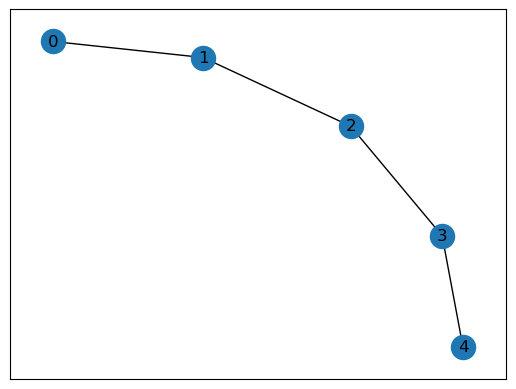

In [23]:
#Epidemias e Marketing viral

#tempo de propagação
#cada instante de tempo(independente da unidade de tempo), cada nó vai passar para o vizinho
G = nx.path_graph(5)
nx.draw_networkx(G)

In [24]:
#observando os nós
#o nó 2 precisa de 2 passo para chegar nas bordas (Excentricidade) 
#a excentricidade do nó é a distancia maxima para todos os outros nós da rede a partir daquele ponto
nx.eccentricity(G)

{0: 4, 1: 3, 2: 2, 3: 3, 4: 4}

In [25]:
#centro da rede
nx.center(G)

[2]

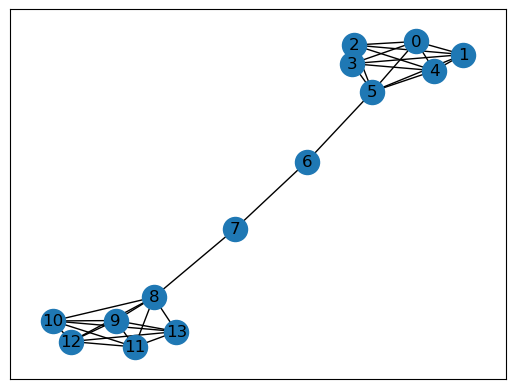

In [26]:
#usando uma rede alter
#centros são os nós 6 e 7
G = nx.barbell_graph(6, 2)
nx.draw_networkx(G)

In [27]:
#melhores nós pra começar uma campanha
#piores nós no contexto de virus, são os que tem mais facilidade pra infectar os outros
nx.center(G)

[6, 7]

In [28]:
nx.eccentricity(G, 6)

3

In [50]:
#testando com uma rede aleatoria
N = 10000
p = 0.01
G = nx.erdos_renyi_graph(N, p, seed=42)
print(G)

Graph with 10000 nodes and 498300 edges


In [52]:
tmax = 10
tau = 0.1  # transmission rate
gamma = 1.0  # recovery rate
rho = 0.001  # random fraction initially infected

In [55]:
nodes_list = list(G.nodes())
initial_infecteds = random.sample(nodes_list, initial_number)

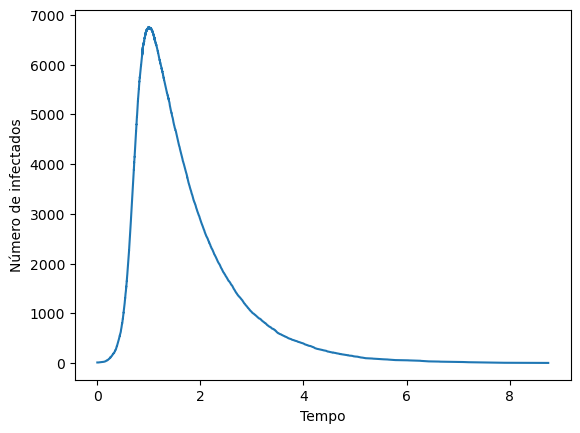

In [56]:
#modelo com imunidade, pega a doença e após fica imune
t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=initial_infecteds, tmax=tmax)


#smiulação do ao longo do tempo, quantas pessoas estarão infectadas
#aqui é onde a pessoa é infectada e depois fica imunizada
#1 até o 2 ficam infectados
#após isso passa
plt.plot(t, I)
plt.xlabel('Tempo')
plt.ylabel('Número de infectados');
plt.show()

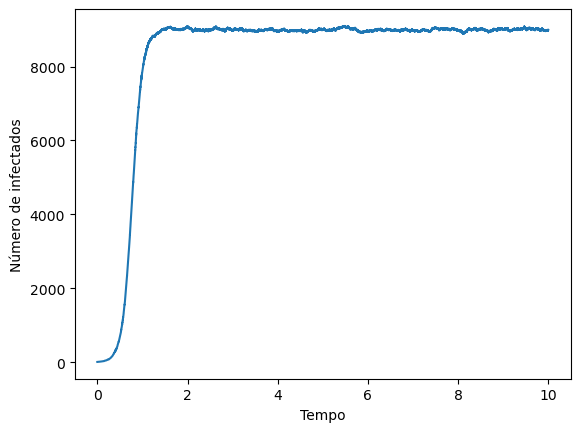

In [57]:
#modelo sem imunidade, contrai a doença e após fica sucetivel a ter novamente
t, S, I = EoN.fast_SIS(G, tau, gamma, initial_infecteds=initial_infecteds, tmax=tmax)

#a infecção aqui também é rapida
#mas ao contrario da anterior a taxa de infecção continua alta
plt.plot(t, I)
plt.xlabel('Tempo')
plt.ylabel('Número de infectados');

In [58]:
#Busca em redes


#rede direcionada de infraestrutura, rodovias da pensilvania
url = 'https://snap.stanford.edu/data/roadNet-PA.txt.gz'
file_path = download_file(url)
file_path

'roadNet-PA.txt.gz'

In [59]:
G = nx.read_edgelist(file_path, create_using=nx.DiGraph)
print(G)

DiGraph with 1088092 nodes and 3083796 edges


In [60]:
#rede sem pesos =
#rede direcionada

#já q é sem peso, irá sortear um valor para cada simular o peso(comprimento/tamanho) de cada aresta(rua)(peso em KM)
np.random.seed(42)
for src, dst in G.edges:
    G.edges[src, dst]['road_length'] = np.random.randint(1, 50)
    #vai sortear entre 1 a 50km
    

In [61]:
#lista de adjacencias
G.adj['0']

AtlasView({'1': {'road_length': 39}, '6309': {'road_length': 29}, '6353': {'road_length': 15}})

In [62]:
#simulando caminhos
nx.shortest_path(G, '0', '1')

['0', '1']

In [63]:
nx.shortest_path(G, '0', '6309')

['0', '6309']

In [64]:
nx.shortest_path(G, '0', '6353')

['0', '6353']

In [65]:
#simulando menor distancia
nx.shortest_path_length(G, '0', '6353')

1

In [66]:
#lista de adjacencias
G.adj['6309']

AtlasView({'0': {'road_length': 8}, '6310': {'road_length': 21}, '6344': {'road_length': 39}})

In [67]:
#simulando caminho de um até o outro
#é possivel ver que não são vizinhos tem q passar entre um nó para chegar no apontado
nx.shortest_path(G, '0', '6310')

['0', '6309', '6310']

In [68]:
#distancia 2
nx.shortest_path_length(G, '0', '6310')

2

In [69]:
#caminho super complexo pra chegar do 0 ao 2
nx.shortest_path(G, '0', '2')

['0',
 '6309',
 '6310',
 '6332',
 '7304',
 '3428',
 '3429',
 '2778',
 '2777',
 '2943',
 '3130',
 '3131',
 '3062',
 '3063',
 '3205',
 '3365',
 '3352',
 '3347',
 '3348',
 '3350',
 '2977',
 '4032',
 '4031',
 '4039',
 '4040',
 '4325',
 '4312',
 '4048',
 '4047',
 '4049',
 '4050',
 '4051',
 '4021',
 '4023',
 '4019',
 '4020',
 '4002',
 '4007',
 '4013',
 '4012',
 '4004',
 '4006',
 '388',
 '4',
 '2']

In [70]:
#distancia 44
nx.shortest_path_length(G, '0', '2')

44

In [71]:
path = nx.shortest_path(G, '0', '2')
len(path) - 1

44

In [72]:
#Busca com pesos
nx.shortest_path(G, '0', '1', weight='road_length')

['0', '1']

In [73]:
nx.shortest_path_length(G, '0', '1', weight='road_length')

39

In [74]:
path_to_2 = nx.shortest_path(G, '0', '2', weight='road_length')
len(path_to_2)

48

In [75]:
#menor distancia
nx.shortest_path_length(G, '0', '2', weight='road_length')

892

In [ ]:
#Ataque direcionados em modelos barabsi é critico
#se não for removido de maneira uniforme
#a rede desconecta muito rapido
#Se for proporcional ao grau, quem tem grau mais alto tem chance de falhar, então a rede desaparece
#por seguir lei de potencia, tem essa vulnerabilidade ao receber um ataque focado mas é mais resiliente em falhas uniformes
#em modelos erdos-renyi não acontece isso, por ser uma rede igualitaria

In [76]:
#falhas em rede

#testando falhas
#Reded aleatoria Erdos-Renyi

#tamanho 5000
#densidade 0.005
n = 5000
p = 0.005
G = nx.erdos_renyi_graph(n, p, seed=42)
print(G)

Graph with 5000 nodes and 62048 edges


In [77]:
#caminho de todo mundo para todo mundo
nx.is_connected(G)

True

In [78]:
#função de ataque
#recebe uma rede G podento ter um ataque direcionado ou não que é a variavel "target" e a seed para garantir que controlemos o ataque
#enquanto estiver conectada(criterio de robustez ser conectada ou não) remove um nó
#a remoção vai ser tanto aleatoria, tanto direcional que vai ter uma chance proporcional ao grau
def attack(g, targeted, seed=None):
    np.random.seed(seed)  # Para fins didáticos, vamos fixar a semente
    num_removed = 0
    while nx.is_connected(g):
        if not targeted:  # Escolha totalmente aleatória
            node_to_remove = np.random.choice(g.nodes)
        else:  # Escolha proporcional ao grau
            degrees = [degree for node, degree in g.degree]
            degrees = np.array(degrees)
            prob = degrees / np.sum(degrees)  # Normalizando para somar 1
            node_to_remove = np.random.choice(g.nodes, p=prob)
        g.remove_node(node_to_remove)
        num_removed += 1
    print(f'Nós removidos até desconectar: {num_removed}')

In [79]:
#criando rede copia H (pra n estragar a G)
#tentando um atque não direcionado
#não importa qual grau tenha, tendo a mesma chance de descontar
#nós removidos nesse caso foram 3082 dos 5000 que tinhamos para estar totalmente desconectada
H = G.copy()
attack(H, targeted=False, seed=42)

Nós removidos até desconectar: 3082


In [80]:
print(H)

Graph with 1918 nodes and 9202 edges


In [81]:
nx.is_connected(H)

False

In [82]:
#ataque direcionado
#focando quem tem maior centralidade de grau

#foram necessarias remover 2747 nós
H = G.copy()
attack(H, targeted=True, seed=42)

Nós removidos até desconectar: 2747


In [83]:
print(H)

Graph with 2253 nodes and 11368 edges


In [84]:
#Redes livre de Escala Barabási-Albert

#gerando barabasi albert com a mesma quantidade de nós da aleatoria
G = nx.barabasi_albert_graph(n, 2, seed=42)
print(G)

Graph with 5000 nodes and 9996 edges


In [85]:
#conexa
nx.is_connected(G)

True

In [86]:
#não direcionado
H = G.copy()
attack(H, targeted=False, seed=42)

Nós removidos até desconectar: 101


In [87]:
print(H)

Graph with 4899 nodes and 9585 edges


In [88]:
nx.is_connected(H)

False

In [89]:
#ataque direcionado
H = G.copy()
attack(H, targeted=True, seed=42)

Nós removidos até desconectar: 33


In [90]:
print(H)

Graph with 4967 nodes and 9653 edges


In [91]:
H = G.copy()
attack(H, targeted=False, seed=1)

Nós removidos até desconectar: 58


In [92]:
H = G.copy()
attack(H, targeted=True, seed=1)

Nós removidos até desconectar: 7


In [97]:
#Recomendação em redes

#Recomendação de conteudos
#formulas de calcular: Vizinhos em comum/ coeficiente de jaccard/ adamic-adar/conexão preferencial

#artigo na area de astrofisica
#1993-2003
url = 'https://snap.stanford.edu/data/ca-AstroPh.txt.gz'
file_path = download_file(url)
file_path

'ca-AstroPh.txt.gz'

In [98]:
G = nx.read_edgelist(file_path)
print(G)

Graph with 18772 nodes and 198110 edges


In [99]:
#nó 276
#grau 31
#trabalhou com 31 pessoas diferentes
target_node = '276'
G.degree[target_node]

31

In [100]:
#gerando recomendação
#função de vizinhos em comum, passando uma lista de pares de nós, nó origem e nó destino
#chama função e passa a rede
#origem é o cliente, e o destino por exemplo é o "283"
pairs = [(target_node, '283')]
recommendation = nx.common_neighbor_centrality(G, pairs, alpha=1.0)
recommendation = list(recommendation)
recommendation
#esses nós de resultado tem 1 vizinho em comum

#nó 276, alvo 283, peso 1

[('276', '283', 1)]

In [101]:
#função de não vizinhos
list(nx.non_neighbors(G, target_node))[:10]

['1662',
 '5089',
 '6058',
 '6229',
 '10639',
 '16442',
 '19325',
 '19834',
 '21937',
 '25452']

In [102]:
#lista de recomendações possiveis
#lista de não vizinhos
#formada de todas as arestas que ainda não existem, partindo do cliente
available_recs = [(target_node, n) for n in nx.non_neighbors(G, target_node)]

In [103]:
#lista de rocmendações
#recomendações por vizinho em comum alpha = 1(para calcular apenas o numero de vizinhos em comum)

recommendation = nx.common_neighbor_centrality(G, available_recs, alpha=1.0)
recommendation = pd.DataFrame(
    recommendation,
    columns=['source', 'destination', 'prediction']
)
recommendation.sort_values('prediction', ascending=False)
#colocação de vizinhos em comum

,source,destination,prediction
34,276,72391,4
39,276,78627,4
13,276,32432,3
37,276,77098,3
6256,276,15309,3
...,...,...,...
6549,276,93404,0
6550,276,95461,0
6551,276,96331,0
6552,276,96364,0


In [104]:
#coecificente de jaccard
#para normalizar pelo total de vizinhos
recommendation2 = nx.jaccard_coefficient(G, available_recs)
recommendation2 = pd.DataFrame(
    recommendation2,
    columns=['source', 'destination', 'prediction']
)
recommendation2.sort_values('prediction', ascending=False)

,source,destination,prediction
34,276,72391,0.117647
12704,276,3539,0.090909
8486,276,132043,0.073171
3303,276,124591,0.064516
1,276,5089,0.064516
...,...,...,...
6549,276,93404,0.000000
6550,276,95461,0.000000
6551,276,96331,0.000000
6552,276,96364,0.000000


In [105]:
#adamic-adar
#vai ponderar pelo inverso do grau do nó usando logaritmo

#logo quem tem um grau muito alto, vai ter menos importancia de quem tem um grau mais baixo
recommendation3 = nx.adamic_adar_index(G, available_recs)
recommendation3 = pd.DataFrame(
    recommendation3,
    columns=['source', 'destination', 'prediction']
)
recommendation3.sort_values('prediction', ascending=False)

,source,destination,prediction
2140,276,120425,1.338287
34,276,72391,1.068811
39,276,78627,1.062724
12704,276,3539,0.993491
12694,276,10110,0.993491
...,...,...,...
6549,276,93404,0.000000
6550,276,95461,0.000000
6551,276,96331,0.000000
6552,276,96364,0.000000


In [106]:
#conexão preferencial
#maior chance se ambos(os 2) tiverem graus altos
#"quem é popular e comum de interagir com quem é popular"

recommendation4 = nx.preferential_attachment(G, available_recs)
recommendation4 = pd.DataFrame(
    recommendation4,
    columns=['source', 'destination', 'prediction']
)
recommendation4.sort_values('prediction', ascending=False)

,source,destination,prediction
315,276,53213,15624
288,276,35290,13237
293,276,38109,13020
2284,276,62821,12958
2115,276,93504,11997
...,...,...,...
17578,276,87910,31
17577,276,117290,31
17576,276,95148,31
5242,276,95880,31


In [107]:
#quem tá mais recomendado
#numeros com graus altos
G.degree['53213'], G.degree['35290']

(504, 427)